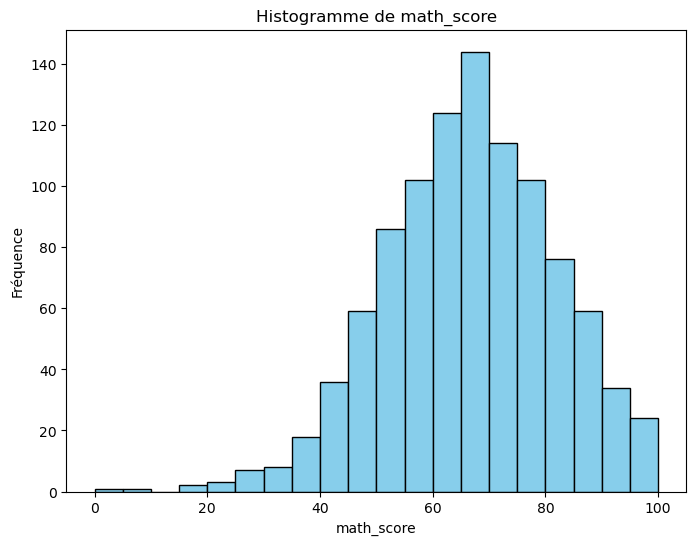

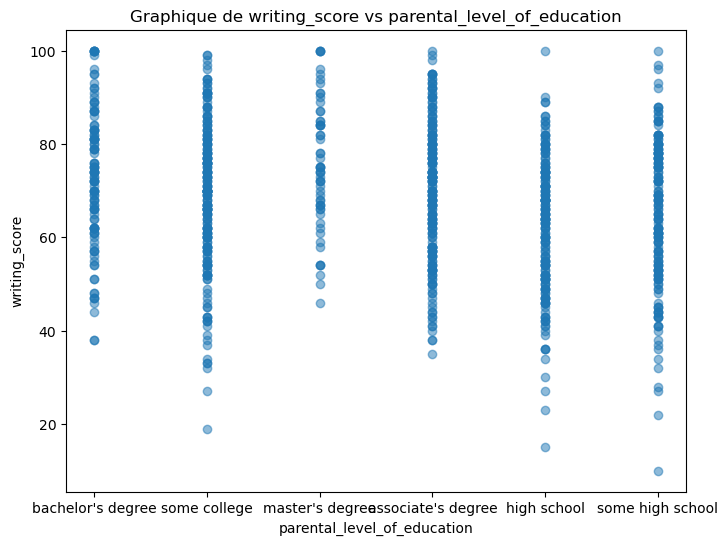

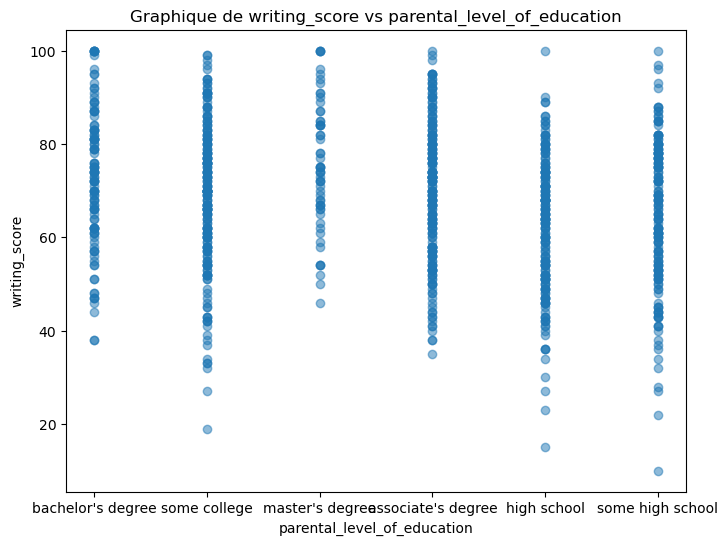

In [16]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

donnees = None  # stocker les données chargées

def charger_donnees():
    global donnees
    # sélectionner un fichier
    fichier = filedialog.askopenfilename(title="Sélectionner un fichier CSV", filetypes=(("Fichiers CSV", "*.csv"), ("Tous les fichiers", "*.*")))
    
    # Vérification de fichier
    if fichier:
        try:
            # Charger les données 
            donnees = pd.read_csv(fichier)
            # Effacer le contenu précédent dans la zone de texte
            zone_texte.delete(1.0, tk.END)
            # Afficher les données dans la zone de texte
            zone_texte.insert(tk.END, donnees)
            
            # Mettre à jour la combobox des colonnes avec les nouvelles données
            colonne_combobox['values'] = tuple(donnees.columns)
            colonne_combobox1['values'] = tuple(donnees.columns)  # Mise à jour de la première combobox
            colonne_combobox2['values'] = tuple(donnees.columns)  # Mise à jour de la deuxième combobox
            
        except Exception as e:
            # chargement des données échoue
            print("Erreur lors du chargement des données :", e)
def afficher_statistiques():
    global donnees
    if donnees is not None:
        # utilisation de NumPy
        statistiques = donnees.describe()
        # Effacer le contenu précédent dans la zone de texte
        zone_texte.delete(1.0, tk.END)
        # Affichage de statistique
        zone_texte.insert(tk.END, statistiques)
    else:
        # aucune donnée n'a été chargée
        zone_texte.delete(1.0, tk.END)
        zone_texte.insert(tk.END, "Veuillez d'abord charger des données.")

def afficher_histogramme():
    global donnees
    if donnees is not None:
        # Sélectionner la colonne à afficher dans l'histogramme
        colonne_selectionnee = colonne_selection.get()
        if colonne_selectionnee:
            # Créer l'histogramme avec matplotlib
            plt.figure(figsize=(8, 6))
            plt.hist(donnees[colonne_selectionnee], bins=20, color='skyblue', edgecolor='black')
            plt.xlabel(colonne_selectionnee)
            plt.ylabel('Fréquence')
            plt.title('Histogramme de ' + colonne_selectionnee)
            
            # Afficher l'histogramme dans une nouvelle fenêtre tkinter
            histogramme_window = tk.Toplevel()
            histogramme_window.title('Histogramme')
            canvas = FigureCanvasTkAgg(plt.gcf(), master=histogramme_window)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
            
        else:
            zone_texte.delete(1.0, tk.END)
            zone_texte.insert(tk.END, "Veuillez sélectionner une colonne.")
    else:
        zone_texte.delete(1.0, tk.END)
        zone_texte.insert(tk.END, "Veuillez d'abord charger des données.")

def afficher_graphique():
    global donnees
    if donnees is not None:
        # Sélectionner les colonnes pour le graphique
        colonne_selectionnee1 = colonne_selection1.get()
        colonne_selectionnee2 = colonne_selection2.get()
        if colonne_selectionnee1 and colonne_selectionnee2:
            # Créer le graphique avec matplotlib
            plt.figure(figsize=(8, 6))
            plt.scatter(donnees[colonne_selectionnee1], donnees[colonne_selectionnee2], alpha=0.5)
            plt.xlabel(colonne_selectionnee1)
            plt.ylabel(colonne_selectionnee2)
            plt.title('Graphique de {} vs {}'.format(colonne_selectionnee2, colonne_selectionnee1))
            
            # Afficher le graphique dans une nouvelle fenêtre tkinter
            graphique_window = tk.Toplevel()
            graphique_window.title('Graphique')
            canvas = FigureCanvasTkAgg(plt.gcf(), master=graphique_window)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
            
        else:
            zone_texte.delete(1.0, tk.END)
            zone_texte.insert(tk.END, "Veuillez sélectionner deux colonnes.")
    else:
        zone_texte.delete(1.0, tk.END)
        zone_texte.insert(tk.END, "Veuillez d'abord charger des données.")

# tkinter
fenetre = tk.Tk()
fenetre.title("manipulation des donneess")
fenetre.geometry("1200x600")

# les boutons
frame_boutons = tk.Frame(fenetre)
frame_boutons.pack()

bouton_charger = tk.Button(frame_boutons, text="Charger des données", command=charger_donnees)
bouton_charger.pack(side=tk.LEFT, padx=10, pady=10)

bouton_statistiques = tk.Button(frame_boutons, text="Afficher les statistiques", command=afficher_statistiques)
bouton_statistiques.pack(side=tk.LEFT, padx=10, pady=10)

# Créer une combobox pour sélectionner une colonne (pour l'histogramme)
colonne_selection = tk.StringVar()
colonne_combobox = ttk.Combobox(frame_boutons, textvariable=colonne_selection)
colonne_combobox.pack(side=tk.LEFT, padx=10, pady=10)

bouton_histogramme = tk.Button(frame_boutons, text="Afficher l'histogramme", command=afficher_histogramme)
bouton_histogramme.pack(side=tk.LEFT, padx=10, pady=10)

# Créer les combobox pour sélectionner les colonnes (pour le graphique)
colonne_selection1 = tk.StringVar()
colonne_combobox1 = ttk.Combobox(frame_boutons, textvariable=colonne_selection1)
colonne_combobox1.pack(side=tk.LEFT, padx=10, pady=10)

colonne_selection2 = tk.StringVar()
colonne_combobox2 = ttk.Combobox(frame_boutons, textvariable=colonne_selection2)
colonne_combobox2.pack(side=tk.LEFT, padx=10, pady=10)

bouton_graphique = tk.Button(frame_boutons, text="Afficher le graphique", command=afficher_graphique)
bouton_graphique.pack(side=tk.LEFT, padx=10, pady=10)

# Créer une zone de texte avec une barre de défilement
scrollbar = tk.Scrollbar(fenetre)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

zone_texte = tk.Text(fenetre, yscrollcommand=scrollbar.set)
zone_texte.pack(fill=tk.BOTH, expand=True)
scrollbar.config(command=zone_texte.yview)


# Lancer la boucle principale tkinter
fenetre.mainloop()


ModuleNotFoundError: No module named 'cv2'